In [125]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# img import 및 그레이스케일 화
img = cv2.imread('img/20230517224803_00001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (3,3), 0)

In [127]:
# 색상 반전
# invert = img.copy()
# invert = 255 - invert
# invert.size

(2335, 1651)


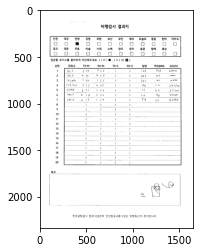

In [128]:
# 임계값 지정
# ret, thresh = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY_INV)
thresh = cv2.Canny(img, 96, 255)

# dilate (팽창)
# dilate = cv2.dilate(thresh, (3,3), iterations=2)
# cv2.imshow("2", thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(thresh.shape)
plt.imshow(thresh, cmap='binary')

In [129]:
# 가장 넓이가 큰 경계값 찾기 ( 중앙의 결과값 테이블 )
images, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# images = cv2.cvtColor(images, cv2.COLOR_GRAY2BGR)
contour_array = sorted(contours, key=cv2.contourArea, reverse=True)

table_data = contour_array[0]
x, y, w, h = cv2.boundingRect(table_data)


In [130]:
# 칸마다 마진을 두어 탐색 진행

col_count = 8
row_count = 20

margin = [4, 2]

cell_width = round(w / col_count) - margin[0]
cell_height = round(h / row_count) - margin[1]

# cv2.putText(images, "BIG AREA", (x, y), cv2.FONT_ITALIC, 10, (255, 255, 0), 2)
# cv2.rectangle(images, (x, y), (x + w, y + h), (255, 255, 0), 3)

In [131]:
coord = [x, y]
img_arr = []
for y_ in range(row_count):
    row = []
    for x_ in range(col_count):
        # if x_ == 0:
        # continue
        position = [coord[0] - round(cell_width * 0.05), coord[1] - round(cell_height * 0.05)]
        # if y_ % 2 == 0 and x_ < 4:
        #     cv2.imshow(str(y_) + '-' + str(x_),
        #                images[position[1]:position[1] + cell_height, position[0]:position[0] + cell_width])
        #     cv2.waitKey(0)
        #     cv2.destroyAllWindows()

        # cv2.rectangle(images, (position[0], position[1]),
        #               (position[0] + cell_width + round(cell_width * 0.1),
        #                position[1] + cell_height + round(cell_width * 0.1)), (255, 255, 0),
        #               thickness=2)

        row.append(images[position[1]:position[1] + cell_height + round(cell_width * 0.1),
                    position[0]:position[0] + cell_width + round(cell_width * 0.1)])

        coord[0] += cell_width + margin[0]

    img_arr.append(row)
    coord[1] += cell_height + margin[1]
    coord[0] = x

img_arr = np.array(img_arr)
# cv2.imshow("ctr", images)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img_arr.shape  # return (row, col, height, width)

(20, 8, 52, 158)

In [132]:
for y in img_arr:
    for x in y:
        img_ctr, contours_, _ = cv2.findContours(x, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        boundary = [cv2.boundingRect(each) for each in contours_]
        boundary = sorted(boundary)

        cv2.imshow("ctr", x)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # 가장 밖에 있는 경계선 찾기
        contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours_]
        biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

        # 경계선 검은색으로 칠하기
        cv2.drawContours(img_ctr, biggest_contour, -1, (0,0,0), 4)

        cv2.imshow("ctr", img_ctr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # 칠한 경계선 지우고 다시 숫자의 경계 직사각형 찾기
        # ret_, img_th = cv2.threshold(img_ctr, 127, 255, cv2.THRESH_BINARY_INV)
        img_ctr, contours_, _ = cv2.findContours(img_ctr.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


        # 경계 직사각형 그리기
        boundary_rects = [cv2.boundingRect(each) for each in contours_]
        boundary_rects = sorted(boundary_rects)
        for rect in boundary_rects:
            minimum = (cell_width * 0.05) * (cell_height * 0.05)

            # if abs(rect[0] - rect[2]) > 10 and abs(rect[1] - rect[3]) > 10:
            if (abs(rect[0] - rect[2]) * (rect[1] - rect[3])) > minimum:
                print(f'x:{rect[0] - rect[2]} y:{rect[1] - rect[3]} | received {(rect[0] - rect[2]) * (rect[1] - rect[3])}')
                cv2.rectangle(img_ctr, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (255,255,255), 1)

        cv2.imshow("ctr", img_ctr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        break
#
#         img_indiv, ct, hi = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#
#         rect = [cv2.boundingRect(each) for each in ct]
#         rect = sorted(rect)
#
#         print(rect)
#         for rec in rect:
#             # print(rec)
#             cv2.circle(img_indiv, (rec[0], rec[1]), 10, (0, 0, 255), -1)
#             cv2.circle(img_indiv, (rec[0] + rec[2], rec[1] + rec[3]), 10, (0, 0, 255), -1)
#             cv2.rectangle(img_indiv, (rec[0], rec[1]), (rec[0] + rec[2], rec[1] + rec[3]), (0, 255, 0), 3)
#         cv2.imshow('a', img_indiv)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
#


(38, 18, 5, 26)
(47, 26, 12, 17)
(64, 26, 4, 17)
(74, 39, 2, 4)
(87, 23, 12, 17)
(35, 21, 3, 19)
(46, 17, 9, 21)
(61, 20, 10, 17)
(78, 37, 3, 4)
(90, 19, 9, 22)
(31, 18, 3, 17)
(44, 19, 11, 17)
(60, 22, 9, 17)
(78, 37, 3, 4)
(85, 25, 13, 16)
(102, 22, 10, 18)
(114, 19, 11, 18)
(27, 20, 4, 15)
(41, 18, 11, 15)
(64, 18, 9, 21)
(81, 37, 3, 3)
(93, 19, 13, 18)
(111, 27, 1, 3)
(114, 21, 7, 19)
(129, 21, 8, 16)
(34, 17, 16, 19)
(61, 16, 12, 20)
(81, 13, 9, 18)
(93, 31, 3, 4)
(98, 14, 10, 21)
(36, 18, 15, 12)
(52, 16, 15, 19)
(71, 17, 8, 18)
(85, 31, 4, 5)
(95, 16, 8, 12)
(37, 20, 9, 17)
(54, 18, 13, 18)
(70, 17, 7, 21)
(83, 23, 2, 2)
(86, 34, 3, 3)
(95, 18, 12, 16)


In [133]:
resize = cv2.resize(images, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
cv2.imshow("area", resize)
cv2.waitKey(0)
cv2.destroyAllWindows()